In [17]:
import pandas as pd 
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
    
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [18]:
X = pd.read_csv("all-data.csv").drop("Date", axis=1)

In [19]:
useable_X = X.loc[X["Index"] < len(X)-60]
useable_y = X.loc[X["Index"] > 59]["New Cases"]
predict_X = X.loc[X["Index"] >= len(X) - 60]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(useable_X, useable_y, test_size = 0.3, train_size = .5)

In [21]:
features = X.columns

In [22]:
def plot_model(model):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    # ax.set_ylim([0, 1200])
    # ax.scatter(predict["Index"], model.predict(predict))
    ax.plot(predict_X["Index"], model.predict(predict_X))
    ax.set_title("Prediction")
    
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    # ax2.set_ylim([0, 1200])
    ax2.scatter(useable_X["Index"], useable_y)
    ax2.plot(useable_X["Index"], model.predict(useable_X))
    ax2.set_title("Training Data")
    

In [23]:
def print_scores(model):
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))
    print(model.score(useable_X, useable_y))

In [24]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
print_scores(forest)

0.9502432761346156
0.6650221175226204
0.8148577255719476


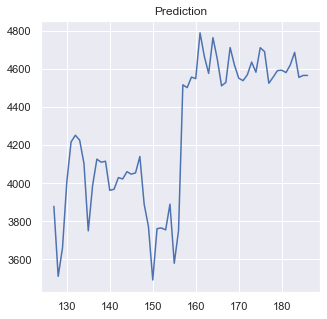

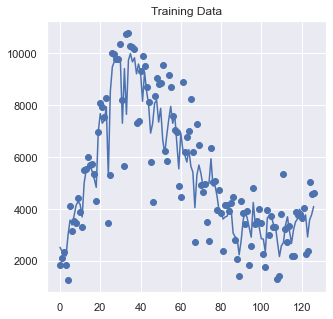

In [26]:
plot_model(forest)

In [27]:
mae_forest = RandomForestRegressor(criterion="mae")
mae_forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mae')

In [28]:
print_scores(mae_forest)

0.9511286394526295
0.6876516022470696
0.822376416797525


In [29]:
sqrt_forest = RandomForestRegressor(max_features="sqrt")
sqrt_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [30]:
print_scores(sqrt_forest)

0.9546338409592893
0.6891902092284383
0.825819588579489


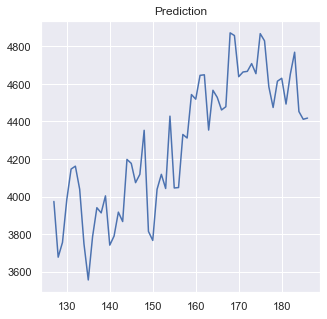

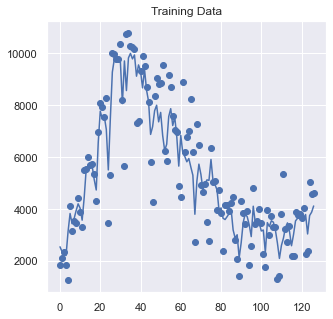

In [33]:
plot_model(sqrt_forest)

In [31]:
log_forest = RandomForestRegressor(max_features="log2")
log_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='log2')

In [32]:
print_scores(log_forest)

0.952275161899306
0.7149004695566183
0.8332365825977086
